In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [47]:
df = pd.read_csv("data/parsed-games.csv")
print('loaded data frame with {} rows and {} columns'.format(df.shape[0], df.shape[1]))

loaded data frame with 20665 rows and 22 columns


In [48]:
print(df.columns.tolist())

['game_id', 'file_name', 'game_format', 'tier', 'p1_name', 'p2_name', 'p1_elo', 'p2_elo', 'p1_p1', 'p1_p2', 'p1_p3', 'p1_p4', 'p1_p5', 'p1_p6', 'p2_p1', 'p2_p2', 'p2_p3', 'p2_p4', 'p2_p5', 'p2_p6', 'winner_name', 'winner_player_number']


In [49]:
# need to drop the null rows
# drop rows where p1_p1 is null and p2_p1 is null
print("shape before drop: {}".format(df.shape))
df = df.dropna(subset=['p1_p1', 'p2_p1'])
print("shape after drop: {}".format(df.shape))

shape before drop: (20665, 22)
shape after drop: (7285, 22)


In [50]:
# 'game_format', 'tier', 'p1_elo', 'p2_elo', 'p1_p1', 'p1_p2', 'p1_p3', 'p1_p4', 'p1_p5', 'p1_p6', 'p2_p1', 'p2_p2', 'p2_p3', 'p2_p4', 'p2_p5', 'p2_p6'
x = df[['game_format', 'tier', 'p1_p1', 'p1_p2', 'p1_p3', 'p1_p4', 'p1_p5', 'p1_p6', 'p2_p1', 'p2_p2', 'p2_p3', 'p2_p4', 'p2_p5', 'p2_p6']]
y = df['winner_player_number'].apply(lambda x: 1 if x == 1 else 0)

# print the class balance
print("class balance: {}".format(y.value_counts()))

class balance: 0    3697
1    3588
Name: winner_player_number, dtype: int64


In [52]:
# need to one hot encode the categorical variables (all columns are categorical)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
x_coded = encoder.fit_transform(x)
print("shape of x_coded: {}".format(x_coded.shape))
# split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_coded, y, test_size=0.2, random_state=42)

shape of x_coded: (7285, 8423)


In [57]:
# train a gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
# import logistic regression
from sklearn.linear_model import LogisticRegression
model = GradientBoostingClassifier(
    n_estimators=20,
    learning_rate=0.001,
    max_depth=1000,
    random_state=42
)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# print the accuracy
from sklearn import metrics
print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy: 0.5346602608098833


In [38]:
# plot the learning graph
from sklearn.metrics import mean_squared_error
losses = []
accuracies = []
for i, y_pred in enumerate(model.staged_predict(x_test)):
    losses.append(mean_squared_error(y_test, y_pred))
    accuracies.append(metrics.accuracy_score(y_test, y_pred))

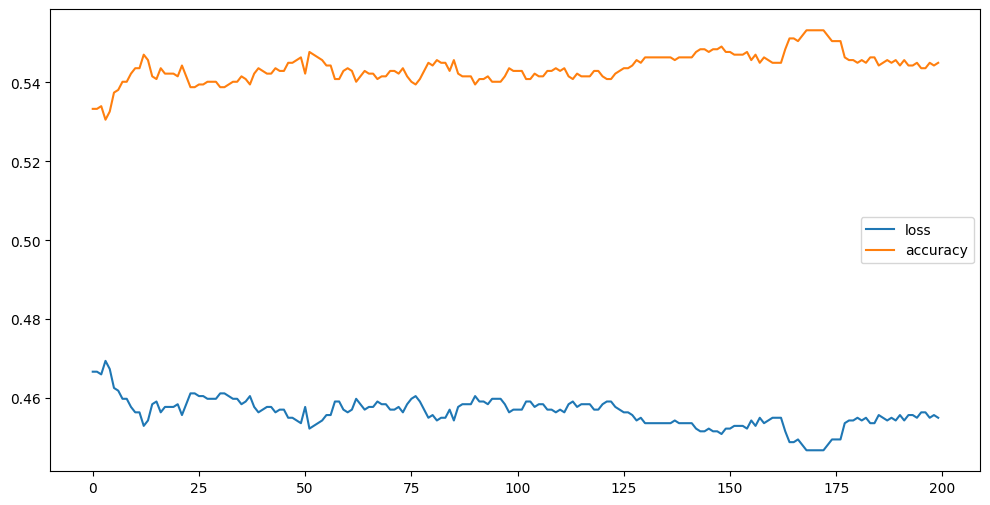

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(losses, label='loss')
plt.plot(accuracies, label='accuracy')
plt.legend()
plt.show()

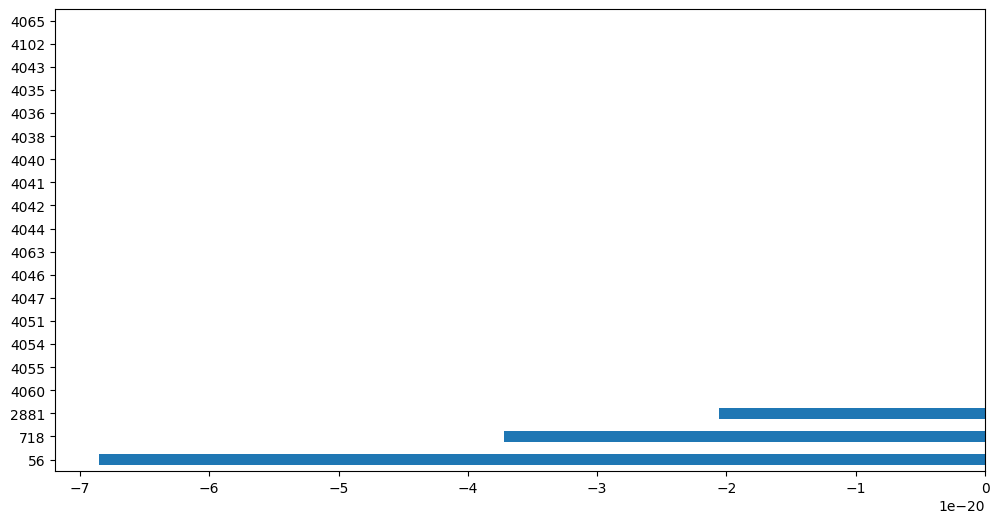

In [71]:
# plot the feature importances
feature_importances = model.feature_importances_
feature_importances = pd.Series(feature_importances)
feature_importances = feature_importances.sort_values()[0:20]   
feature_importances.plot(kind='barh', figsize=(12, 6))
plt.show()
